In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = sns.load_dataset('titanic')

In [3]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Cleaning**

In [6]:
df.duplicated().sum()

np.int64(107)

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Check Missing Values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,106
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Fill mising vaues with mode
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [11]:
# Fill misining values with mean
df['age'].fillna(df['age'].mean(),inplace=True)

Remove extra feature

In [12]:
# Remove "Deck" feature
df.drop('deck',axis=1,inplace=True)

In [13]:
# Remove "Embarked" feature
df.drop('embarked',axis=1,inplace=True)

In [14]:
x = df.drop(['who','adult_male'],axis=1,inplace=True)

**Feature Engingeering**

In [15]:
# Create new column of total family member
df['Family'] = df['sibsp'] + df['parch']

In [16]:
# binning and create new column of Age_Group
bins = [0,10,20,35,50,85]
labels = ['Children','adults','young','senior','old']
df['Age_Group'] = pd.cut(df['age'],bins=bins,labels=labels)

In [17]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alive,alone,Family,Age_Group
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,no,False,1,young
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,yes,False,1,senior


**Data Analysis**

In [18]:
# Explore the complete data of top highest paying fare
df.sort_values('fare',ascending=False).head(3)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alive,alone,Family,Age_Group
679,1,1,male,36.0,0,1,512.3292,First,Cherbourg,yes,False,1,senior
737,1,1,male,35.0,0,0,512.3292,First,Cherbourg,yes,True,0,young
258,1,1,female,35.0,0,0,512.3292,First,Cherbourg,yes,True,0,young


In [19]:
# Check Fare according to Age_Group
df.groupby('Age_Group')['fare'].mean().sort_values(ascending=False).head(5)

,fare
Age_Group,
senior,44.790278
old,43.604819
young,31.238147
adults,30.673627
Children,30.611838


In [20]:
# Count how many people are survived or nto
df.groupby('sex')['survived'].value_counts()

sex     survived
female  1           217
        0            76
male    0           385
        1           106
Name: count, dtype: int64

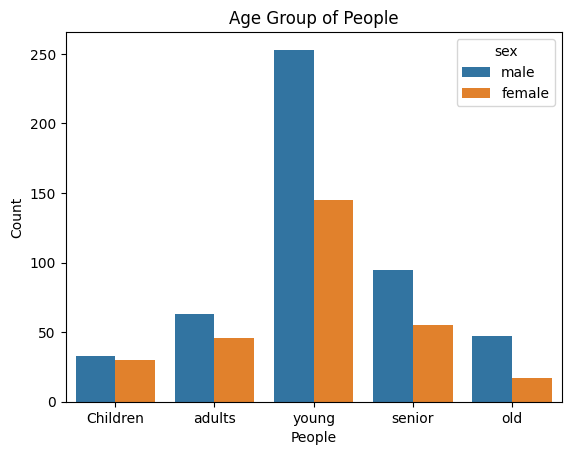

In [21]:
# Counting of People according to thier age_group
sns.countplot(x='Age_Group',hue='sex',data=df)
plt.title('Age Group of People')
plt.xlabel('People')
plt.ylabel('Count')
plt.show()

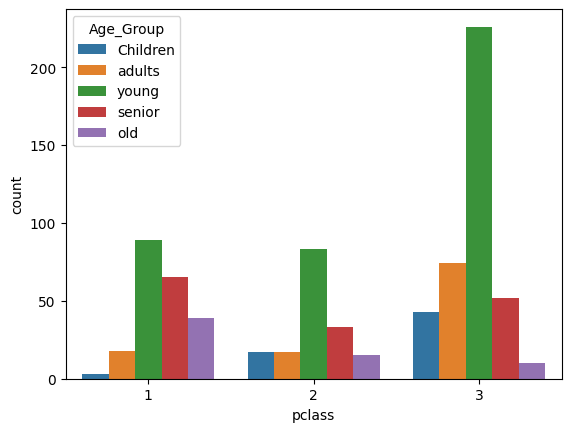

In [22]:
# Counting of people according to Class
sns.countplot(x='pclass',hue='Age_Group',data=df)
plt.show()

**Removing Outliers**

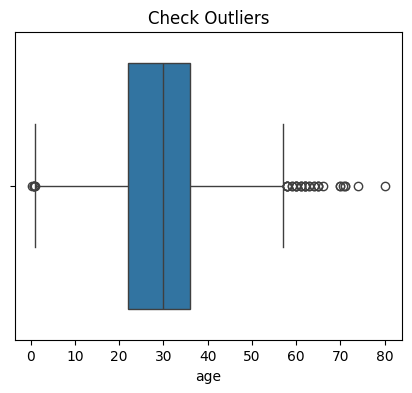

In [23]:
# Check Outliers in Age Column
plt.figure(figsize=(5,4))
sns.boxplot(x=df['age'],data=df)
plt.title('Check Outliers')
plt.show()

In [24]:
# Removing Outliers by IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Filter
df_clean = df[(df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 * IQR)]

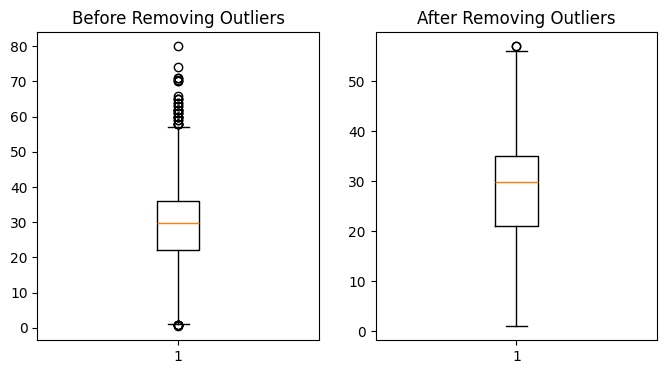

In [25]:
# check outliers remove or not
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['age'])
plt.title("Before Removing Outliers")

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['age'])
plt.title("After Removing Outliers")

plt.show()

In [26]:
# Remove Outliers in Fare column
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3-Q1
clean = df[(df['fare']>=Q1-1.5*IQR) & (df['fare'] <=Q3 + 1.5*IQR)]

Text(0.5, 1.0, 'After Removing Outliers')

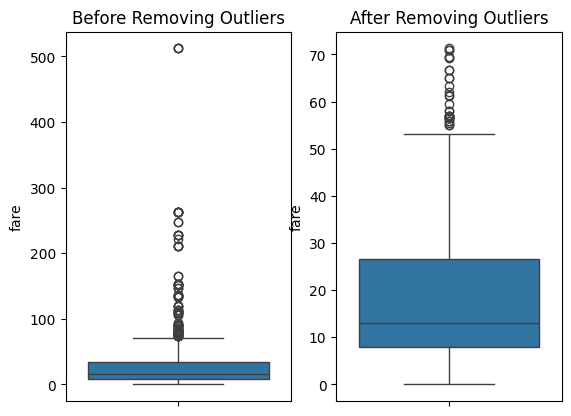

In [27]:
# Check Outliers are remove or not
plt.subplot(1,2,1)
sns.boxplot(df['fare'])
plt.title('Before Removing Outliers')

plt.subplot(1,2,2)
sns.boxplot(clean['fare'])
plt.title('After Removing Outliers')

Encoded these columns for ML Model

In [28]:
jk = {'male':1,'female':0}
df['sex'] = df['sex'].map(jk)

In [29]:
kj = {'Third':3,'First':1,'Second':2}
df['class'] = df['class'].map(kj)

In [30]:
df['alone'] = df['alone'].map({True:1,False:0})

In [31]:
df['alive'] = df['alive'].map({'yes':1,'no':0})

In [32]:
c = {'Southampton':1,'Cherbourg':2,'Queenstown':3}
df['embark_town'] = df['embark_town'].map(c)

In [33]:
mn = {'Children':0,'adults':1,'young':2,'senior':3,'old':4}
df['Age_Group'] = df['Age_Group'].map(mn)

In [34]:
df.drop('alive',axis=1,inplace=True)

In [35]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,Family,Age_Group
0,0,3,1,22.0,1,0,7.2500,3,1,0,1,2
1,1,1,0,38.0,1,0,71.2833,1,2,0,1,3
2,1,3,0,26.0,0,0,7.9250,3,1,1,0,2


In [37]:
# Import Some Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Put input feature in x and output in y
x = df.drop('survived',axis=1)
y = df['survived']

In [39]:
# Set training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
lg = LogisticRegression( max_iter=250)

In [41]:
# Fit Logistic Regression
lg.fit(x_train,y_train)

LogisticRegression(max_iter=250)

In [42]:
# Check Score
lg.score(x_test,y_test), lg.score(x_train,y_train)

(0.7579617834394905, 0.784688995215311)

**Fit DecissionTreeClassifier with hyperparameter Tuning**

In [43]:
dt = DecisionTreeClassifier(max_depth=5,random_state=42)

In [44]:
# Fit DecissionTree Model
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [45]:
dt.score(x_test,y_test), dt.score(x_train,y_train)

(0.7770700636942676, 0.8325358851674641)

**Fit RandomForestClassifier**

In [46]:
rf = RandomForestClassifier(n_estimators=150,max_depth=7,min_samples_leaf=1)

In [47]:
# Fit RandomForest Model
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=150)

In [48]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.7770700636942676, 0.8947368421052632)

Hyperparameter Tunning

In [49]:
var = ({
    'max_depth':[3,5,7,10],
    'n_estimators': [50,80,110,150],
    'min_samples_leaf': [1,3,5,7],

})

In [50]:
gd = GridSearchCV(RandomForestClassifier(),param_grid=var,cv=2)

In [51]:
gd.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [50, 80, 110, 150]})

In [ ]:
gd.best_params_

{'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 150}

In [ ]:
df.head()

,survived,pclass,age,sibsp,parch,fare,Family,sex,class,alone,embark_town,Age_Group
0,0,3,22.0,1,0,7.2500,1,1,3,0,1,2
1,1,1,38.0,1,0,71.2833,1,0,1,0,2,3
2,1,3,26.0,0,0,7.9250,0,0,3,1,1,2
3,1,1,35.0,1,0,53.1000,1,0,1,0,1,2
4,0,3,35.0,0,0,8.0500,0,1,3,1,1,2


In [ ]:
# Check Prediction of RandomForest Model
rf.predict([[3,22.0,1,0,7.2500,1,1,3,0,1,2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

Now Create Model with Pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
num_feature = ['age','fare','Family']
cat_feature = ['sex','embark_town','Age_Group']

In [ ]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scalar', StandardScaler())
])

In [ ]:
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

In [ ]:
preprocessing = ColumnTransformer([
    ('num', num_pipe,num_feature),
    ('cat', cat_pipe,cat_feature)
])

In [ ]:
pipeline = Pipeline([
    ('pipe', preprocessing),
    ('model', RandomForestClassifier())
])

In [ ]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Group,Family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,senior,1


In [ ]:
x = df[['pclass','sex','age','fare','embark_town','Family','Age_Group']]
y = df['survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'Family']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['sex', 'embark_town',
                                                   'Age_Group'])])),
                ('model', RandomForestClassifier())])

In [ ]:
pipeline.score(x_train,y_train)*100, pipeline.score(x_test,y_test)*100

(98.03370786516854, 82.12290502793296)

Check Score of Confusion Matrix, Precission, Recall, F1

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
y_pred = pipeline.predict(x_test)
score = confusion_matrix(y_test,y_pred)
# precision score
score1 = precision_score(y_test,y_pred)
#recall secore
score2 = recall_score(y_test,y_pred)
# F1 score
score3 = f1_score(y_test,y_pred)

In [ ]:
print(f'Confussion: {score}')
print(f'precision_score: {score1}')
print(f'recall_score: {score2}')
print(f'f1_score: {score3}')

Confussion: [[90 15]
 [17 57]]
precision_score: 0.7916666666666666
recall_score: 0.7702702702702703
f1_score: 0.7808219178082192
